### 앙상블 학습 - 앙상블 학습 개요

- 앙상블이란?
    - 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 의미함
    - 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

- 앙상블의 유형
    - 앙상블의 유형은 일반적으로는 보팅(voting), 배깅(Bagging), 부스팅(Boosting)으로 구분할 수 있으며, 이외에 스태킹(Stacking) 등의 기법이 있음
    - 대표적인 배깅은 랜덤 포레스트(Random Forest)알고리즘이 있으며, 부스팅은 에이다 부스팅, 그래디언트 부스팅, XGBoostin, LightGBM등이 있으며, 정형데이터의 분류나 회귀에서는 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냄
    - 넓은 의미로는 서로 다른 모델을 결합한 것들을 앙상블로 지칭하기도 함

- 앙상블의 특징
    - 단일 모델의 약점을 다수의 모델들을 결합하여 보완
    - 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음
    - 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함.
    - 결정 트리의 단점인 과적합(오버 피팅)을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨. 

### 보팅(Voting)과 배깅(Bagging) 개요
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식입니다.
    - 보팅 : 데이터셋은 동일하지만 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는것
    - 배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것

##### 보팅 유형(하드보팅 VS 소프트 보팅)
- 하드 보팅(Hard Voting) : 다수의 classifier 간 다수결로 최종 class 결정
- 소프트 보팅(Soft Voting) : 다수의 classifier들의 class 확률을 평균하여 결정



- 일반적으로 하드보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됨.
- 사이킷런은 VotingClassifier 클래스를 통해 보팅(Voting)을 지원

##### Voting Classifier

In [5]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
from sklearn.ensemble import VotingClassifier

## 단일 모델과 보팅 모델 비교하기
lr_clf = LogisticRegression(solver = "liblinear")
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    test_size = 0.2, 
    random_state = 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


앙상블 모델이 성능이 조금 더 높은 것을 확인할 수 있다.

##### 배깅(Bagging) - 랜덤 포레스트(Random Forest)
- 배깅의 대표적인 알고리즘
- 다재다능한 알고리즘으로 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능으로 보이고 있음
- 여러 개의 결정 트리 분류기가 전체 데이터에서  배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 진행

##### 랜덤포레스트의 부트스트래핑 분할
- 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 **일부가 중첩되게 샘플링**된 데이터 세트이며, 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 함(Bagging = Bootstrap aggregation)


랜덤 포레스트 하이퍼 파라미터
- n_estimators : 결정 트리의 개수를 지정하며, 디폴트는 100. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되지는 않음. 또한, 늘릴수록 학습 수행 시간이 오래걸림
- max_featrues : 결정 트리에 사용된 max_features 파라미터와 동일. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같음.
- max_depth나 min_samples_leaf와 같이 결정트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

##### Random Forest

In [2]:
import pandas as pd
df = pd.read_csv("human_activity.csv")

In [5]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X = df.drop('Activity', axis = 1)
y = df["Activity"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포래스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {0:.4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.9663


In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [8, 16, 24],
    "min_samples_leaf" : [1, 6, 12],
    "min_samples_split" : [2, 8, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0 , n_jobs = -1)   # n_jobs = -1 : 모든 cpu 코어를 사용
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)


print("최적 하이퍼 파라미터 :\n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도 : 0.9713


In [11]:
# GridSearch 결과 성능이 가장 좋았던 파라미터를 적용한다.
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, max_depth = 24,
                                min_samples_split = 2, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9815


In [19]:
# 트리계열의 모델의 경우 모두 feature_importances_를 제공한다.
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(rf_clf1.feature_importances_, index= X_train.columns)
# 중요도 순으로 정렬해준다.
ftr_importances = ftr_importances.sort_values(ascending = False)
ftr_importances

tGravityAcc-min()-X                 0.036946
angle(X,gravityMean)                0.032610
tGravityAcc-mean()-Y                0.032127
tGravityAcc-max()-Y                 0.027356
tGravityAcc-min()-Y                 0.024190
                                      ...   
fBodyAcc-bandsEnergy()-57,64.2      0.000091
fBodyAccJerk-bandsEnergy()-49,56    0.000078
fBodyAccJerk-min()-Z                0.000070
fBodyBodyGyroJerkMag-min()          0.000066
fBodyAccJerk-min()-X                0.000061
Length: 562, dtype: float64

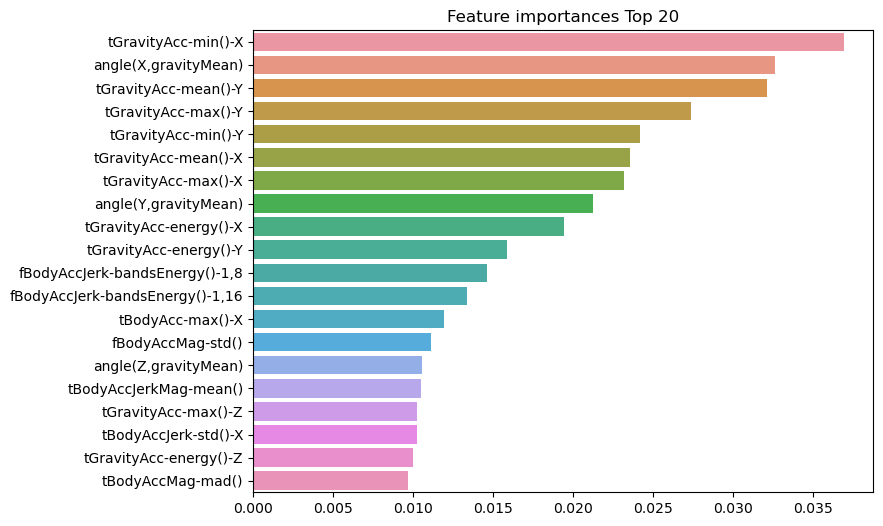

In [22]:
# feature_importances 그래프 그리기~
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

"tGravityAcc-min()-X" 컬럼의 변수가 다른 변수들에 비해 중요도가 높은 것을 확인할 수 있다.

### 부스팅(Boosting)
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 **순차적**으로 학습-예측하면서 잘못 예측한 데이터나 학습 트리에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있음

##### GBM(Gradient Boost Machine) 개요
- GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이임
- 경사 하강법(Gradient Descent) : 
    1. 실제류값)을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것
    2. 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법으로서 머신러닝에서 중요한 기법 중 하나

##### GBM 주요 하이퍼 파라미터 및 튜닝
- loss : 경사 하강법에서 사용할 비용함수 지정. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용
- learning_rate : GBM이 학습을 진행할 때 마다 적용하는 학습률. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1
    - 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 유류 값을 찾아 예측 성능이 높아질 가능성이 있지만, 수행시간이 오래걸리고, 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있음
    - 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능함
- n_estimators : weak learner의 개수(default : 100). weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정수준까지는 좋아질 수 있으나 수행시간이 오래 걸림
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미. 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정.

##### GBM(Gradient Boosting Machine)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위한 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9831
GBM 수행 시간: 611.2 초 


<Axes: >

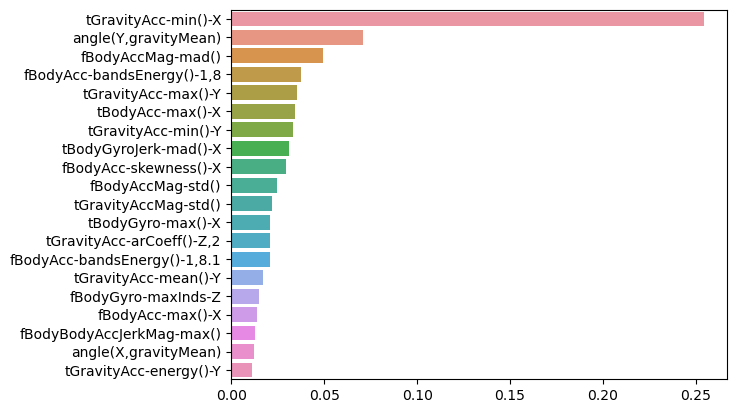

In [34]:
gb_imp = pd.Series(gb_clf.feature_importances_, index = X.columns)
gb_imp.sort_values(ascending = False, inplace = True)
sns.barplot(x = gb_imp[:20], y = gb_imp.index[:20])